In [81]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, ZeroPadding2D, Flatten, Activation, Dropout
import numpy as np
np.random.seed(10)

# Datas Preprocessing
`Error:SSLCertVerificationError`  
Unable to load cifar10 dataset
the solve method is putting this in my python file and it worked:  
```
#忽略 SSL 驗證

import ssl
ssl._create_default_https_context = ssl._create_unverified_context() #舊的
ssl._create_default_https_context = ssl._create_unverified_context #新的
```
Reference:  
[Unable to (manually) load cifar10 dataset](https://stackoverflow.com/questions/69687794/unable-to-manually-load-cifar10-datasethttps://stackoverflow.com/questions/69687794/unable-to-manually-load-cifar10-dataset)    
[cifar10 dataset下載問題](https://blog.csdn.net/qq_41093189/article/details/102783908)  
[AttributeError: 'module' object has no attribute '_create_unverified_context'](https://stackoverflow.com/questions/46882773/attributeerror-module-object-has-no-attribute-create-unverified-context)  


`NameError: name 'x_img_train' is not defined`



In [60]:
print('train:', len(x_img_train))
print('test:', len(x_img_test))

train: 50000
test: 10000


In [61]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context #忽略 SSL 驗證
(x_img_train, y_label_train),(x_img_test, y_label_test) = cifar10.load_data()

In [62]:
print(x_img_train.shape)

(50000, 32, 32, 3)


In [63]:
print(x_img_test[0])

[[[158 112  49]
  [159 111  47]
  [165 116  51]
  ...
  [137  95  36]
  [126  91  36]
  [116  85  33]]

 [[152 112  51]
  [151 110  40]
  [159 114  45]
  ...
  [136  95  31]
  [125  91  32]
  [119  88  34]]

 [[151 110  47]
  [151 109  33]
  [158 111  36]
  ...
  [139  98  34]
  [130  95  34]
  [120  89  33]]

 ...

 [[ 68 124 177]
  [ 42 100 148]
  [ 31  88 137]
  ...
  [ 38  97 146]
  [ 13  64 108]
  [ 40  85 127]]

 [[ 61 116 168]
  [ 49 102 148]
  [ 35  85 132]
  ...
  [ 26  82 130]
  [ 29  82 126]
  [ 20  64 107]]

 [[ 54 107 160]
  [ 56 105 149]
  [ 45  89 132]
  ...
  [ 24  77 124]
  [ 34  84 129]
  [ 21  67 110]]]


In [64]:
print(y_label_train.shape)

(50000, 1)


In [65]:
label_dict = {0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 4:"deer", 5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}

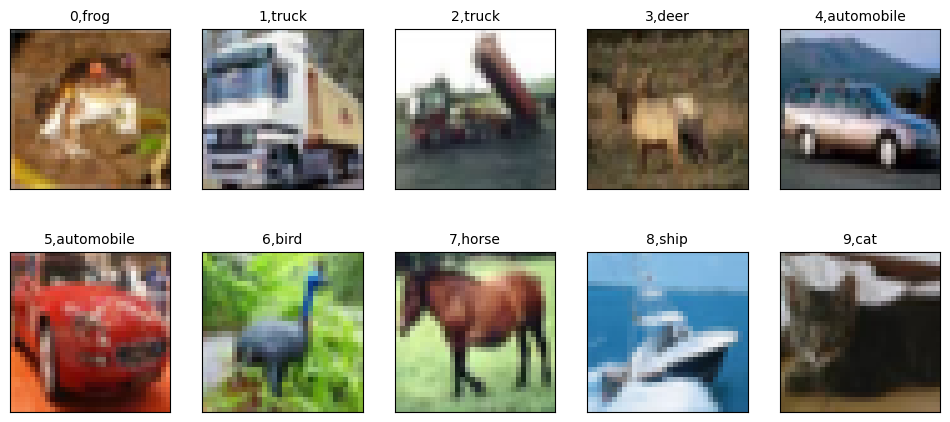

In [66]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num = 10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap = 'binary')
        title = str(i) + ',' + label_dict[labels[i][0]]
        if len(prediction) > 0:
            title += '=>' + label_dict[prediction[i]]
        ax.set_title(title, fontsize = 10)
        ax.set_xticks([]); ax.set_yticks([])
        idx += 1
    plt.show()

plot_images_labels_prediction(x_img_train, y_label_train, [], 0)

In [67]:
x_img_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [68]:
x_img_train_normalize = x_img_train.astype('float32') / 255
x_img_test_normalize = x_img_test.astype('float32') / 255

In [69]:
x_img_test_normalize[0][0][0]

array([0.61960787, 0.4392157 , 0.19215687], dtype=float32)

In [70]:
y_label_train.shape

(50000, 1)

In [71]:
y_label_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [72]:
from tensorflow.python.keras.utils import np_utils
y_label_train_onehot = np_utils.to_categorical(y_label_train)
y_label_test_onehot = np_utils.to_categorical(y_label_test)

In [73]:
y_label_test_onehot.shape

(10000, 10)

In [74]:
y_label_test_onehot[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [75]:
print("train data:", 'images:', x_img_train.shape, "labels:", y_label_train.shape)
print("train data:", 'images:', x_img_test.shape, "labels:", y_label_test.shape)

train data: images: (50000, 32, 32, 3) labels: (50000, 1)
train data: images: (10000, 32, 32, 3) labels: (10000, 1)


# Build Model

In [84]:
model = Sequential()
model.add(Conv2D(
    filters = 32,
    kernel_size = (3, 3),
    input_shape = (32, 32 ,3),
    activation = 'relu',
    padding = 'same'
))

model.add(Dropout(
    rate = 0.25
))

model.add(MaxPooling2D(
    pool_size = (2, 2)
))

model.add(Conv2D(
    filters = 64,
    kernel_size = (3, 3),
    activation = 'relu',
    padding = 'same'
))

model.add(Dropout(0.25))

model.add(MaxPooling2D(
    pool_size = (2, 2)
))

model.add(Flatten())
model.add(Dropout(
    rate = 0.25
))

model.add(Dense(
    1024,
    activation = 'relu'
))
model.add(Dropout(
    rate = 0.25
))

model.add(Dense(
    10,
    activation = 'softmax'
))

model.summary()

d:\Program\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,224,970 (16.12 MB)

 Trainable params: 4,224,970 (16.12 MB)

 Non-trainable params: 0 (0.00 B)

# Training

In [86]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

train_history = model.fit(
    x_img_train_normalize,
    y_label_train_onehot,
    validation_split=0.2,
    epochs=10,
    batch_size=128,
    verbose=1
    )

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 89ms/step - accuracy: 0.3359 - loss: 1.8372 - val_accuracy: 0.5507 - val_loss: 1.3667
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.5608 - loss: 1.2278 - val_accuracy: 0.6217 - val_loss: 1.1627
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 88ms/step - accuracy: 0.6259 - loss: 1.0582 - val_accuracy: 0.6479 - val_loss: 1.0450
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.6726 - loss: 0.9256 - val_accuracy: 0.6842 - val_loss: 0.9898
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 91ms/step - accuracy: 0.7085 - loss: 0.8339 - val_accuracy: 0.6846 - val_loss: 0.9415
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 91ms/step - accuracy: 0.7417 - loss: 0.7302 - val_accuracy: 0.7126 - val_loss: 0.8711
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 91ms/step - accuracy: 0.7652 - loss: 0.6598 - val_accuracy: 0.7231 - val_loss: 0.8363
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 88ms/step - accuracy: 0.7929 - loss: 0.5890 - 

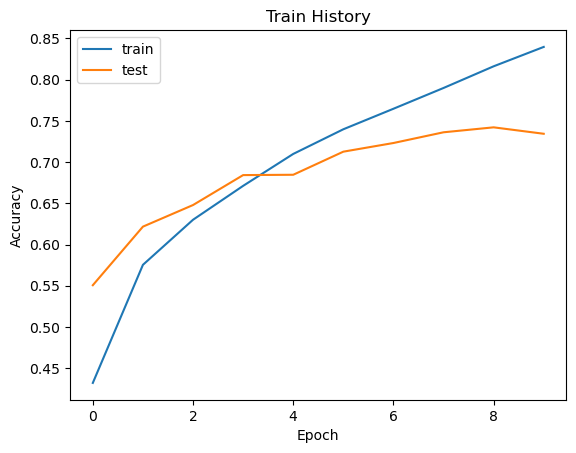

In [88]:
def show_train_history(train_acc, test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc = 'upper left')
    plt.show()

show_train_history('accuracy', 'val_accuracy')

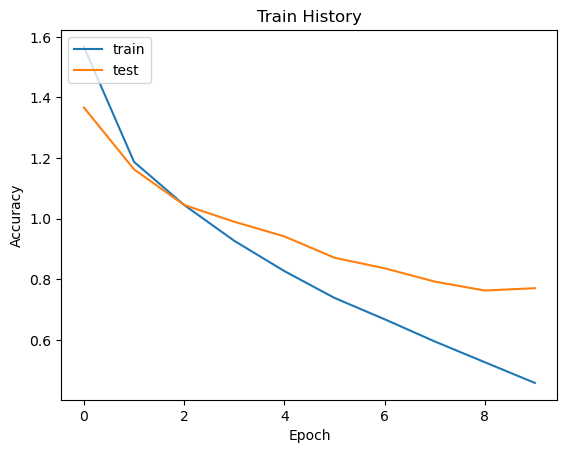

In [89]:
show_train_history('loss', 'val_loss')

# Evaluate model

In [95]:
scores = model.evaluate(
    x_img_test_normalize,
    y_label_test_onehot,
    verbose=0
)

In [97]:
prediction = model.predict(x_img_test_normalize)
prediction[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


array([[3.65307229e-03, 2.31695315e-03, 9.09098517e-03, 7.73924351e-01,
        1.29069202e-02, 1.49601445e-01, 2.78170351e-02, 2.85244337e-03,
        1.19074974e-02, 5.92925074e-03],
       [1.63621618e-03, 6.03372604e-02, 4.25651194e-08, 2.05977656e-07,
        1.57673000e-07, 5.44042464e-08, 1.43275076e-06, 7.12742843e-09,
        9.37776923e-01, 2.47747259e-04],
       [4.21055555e-01, 2.84923725e-02, 3.26659810e-03, 3.04969843e-03,
        7.99609069e-03, 2.06377520e-03, 9.35561373e-04, 1.70716445e-03,
        5.17254055e-01, 1.41791133e-02],
       [6.63905025e-01, 2.31834296e-02, 1.93588510e-02, 2.65777344e-03,
        5.48301730e-03, 5.78128493e-05, 2.21727765e-04, 3.36837184e-05,
        2.83366084e-01, 1.73256628e-03],
       [3.74387866e-07, 8.52311277e-05, 8.51078145e-03, 5.10367528e-02,
        1.07623644e-01, 3.22785490e-04, 8.32391441e-01, 1.41646115e-06,
        2.18676523e-05, 5.75819831e-06],
       [9.40111568e-05, 1.15806542e-04, 6.14327239e-03, 3.06749693e-03,
   

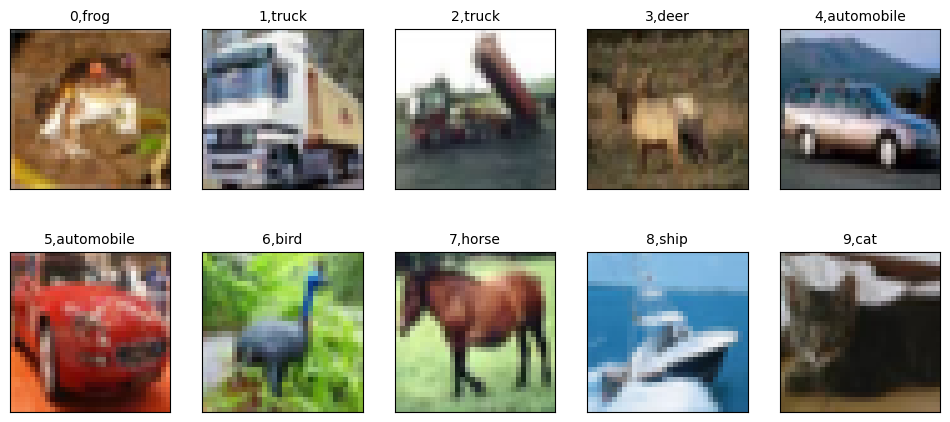

In [99]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num = 10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap = 'binary')
        title = str(i) + ',' + label_dict[labels[i][0]]
        if len(prediction) > 0:
            title += '=>' + label_dict[prediction[i]]
        ax.set_title(title, fontsize = 10)
        ax.set_xticks([]); ax.set_yticks([])
        idx += 1
    plt.show()

plot_images_labels_prediction(x_img_train, y_label_train, [], 0)

label: airplane predict: cat


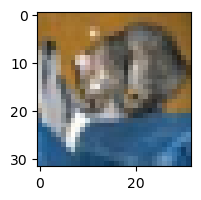

airplane Probability:0.003653072
automobile Probability:0.002316953
bird Probability:0.009090985
cat Probability:0.773924351
deer Probability:0.012906920
dog Probability:0.149601445
frog Probability:0.027817035
horse Probability:0.002852443
ship Probability:0.011907497
truck Probability:0.005929251


In [109]:
def show_Predicted_Probability(y, prediction, x_img, Predicted_Probability, i):
    print('label:', label_dict[y[i]], 'predict:', label_dict[prediction[i]])
    plt.figure(figsize=(2, 2))
    plt.imshow(np.reshape(x_img[i], (32, 32, 3)))
    plt.show()
    for j in range(10):
        print(label_dict[j] + ' Probability:%1.9f' % (Predicted_Probability[i][j]))

show_Predicted_Probability(y_label_test.argmax(axis=1), prediction.argmax(axis=1), x_img_test, Predicted_Probability, 0)

label: airplane predict: airplane


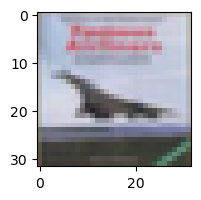

airplane Probability:0.663905025
automobile Probability:0.023183430
bird Probability:0.019358851
cat Probability:0.002657773
deer Probability:0.005483017
dog Probability:0.000057813
frog Probability:0.000221728
horse Probability:0.000033684
ship Probability:0.283366084
truck Probability:0.001732566


In [110]:
show_Predicted_Probability(y_label_test.argmax(axis=1), prediction.argmax(axis=1), x_img_test, Predicted_Probability, 3)

In [111]:
prediction.shape

(10000, 10)

In [112]:
y_label_test.shape

(10000, 1)

In [113]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

# Error
`ValueError: operands could not be broadcast together with shapes (1,10000) (10000,10) `  


In [118]:
predicted_labels = np.argmax(prediction, axis=1)
import pandas as pd
cross_tab = pd.crosstab(y_label_test.reshape(-1), predicted_labels, rownames=['label'], colnames=['predict'])
print(cross_tab)

predict    0    1    2    3    4    5    6    7    8    9
label                                                    
0        788   12   45   13   26    9   17    8   59   23
1         22  833    4    8    8    7   15    2   29   72
2         57    2  576   36  141   75   77   20   10    6
3         26    7   57  444   90  216  113   29   11    7
4         13    2   37   34  792   24   47   41    9    1
5         10    2   31  136   62  676   50   26    4    3
6          1    2   26   33   48   19  865    3    1    2
7         13    4   25   34   85   70   11  753    3    2
8         44   34   15   11    9    6   11    4  854   12
9         44   76    9   18    9   18   14   15   28  769


In [119]:
model = Sequential()
model.add(Conv2D(
    filters = 32,
    kernel_size = (3, 3),
    input_shape = (32, 32 ,3),
    activation = 'relu',
    padding = 'same'
))

model.add(Dropout(
    rate = 0.25
))

model.add(MaxPooling2D(
    pool_size = (2, 2)
))

model.add(Conv2D(
    filters = 64,
    kernel_size = (3, 3),
    activation = 'relu',
    padding = 'same'
))

model.add(Dropout(0.3))

model.add(MaxPooling2D(
    pool_size = (2, 2)
))

model.add(Flatten())
model.add(Dropout(
    rate = 0.3
))

model.add(Dense(
    1024,
    activation = 'relu'
))
model.add(Dropout(
    rate = 0.3
))

model.add(Dense(
    10,
    activation = 'softmax'
))

model.summary()

d:\Program\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,224,970 (16.12 MB)

 Trainable params: 4,224,970 (16.12 MB)

 Non-trainable params: 0 (0.00 B)

In [120]:
train_history = model.fit(
    x_img_train_normalize,
    y_label_train_onehot,
    validation_split=0.2,
    epochs=1,
    batch_size=128,
    verbose=1
    )

ValueError: You must call `compile()` before using the model.